<a href="https://colab.research.google.com/github/souravkarma/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Sourav_Karmakar_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name-NETFLIX MOVIES AND TV SHOWS CLUSTERING**

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Sourav Karmakar**


#**Project Summary**

#**Github Link**

https://github.com/souravkarma/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Sourav_Karmakar_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb

#**Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

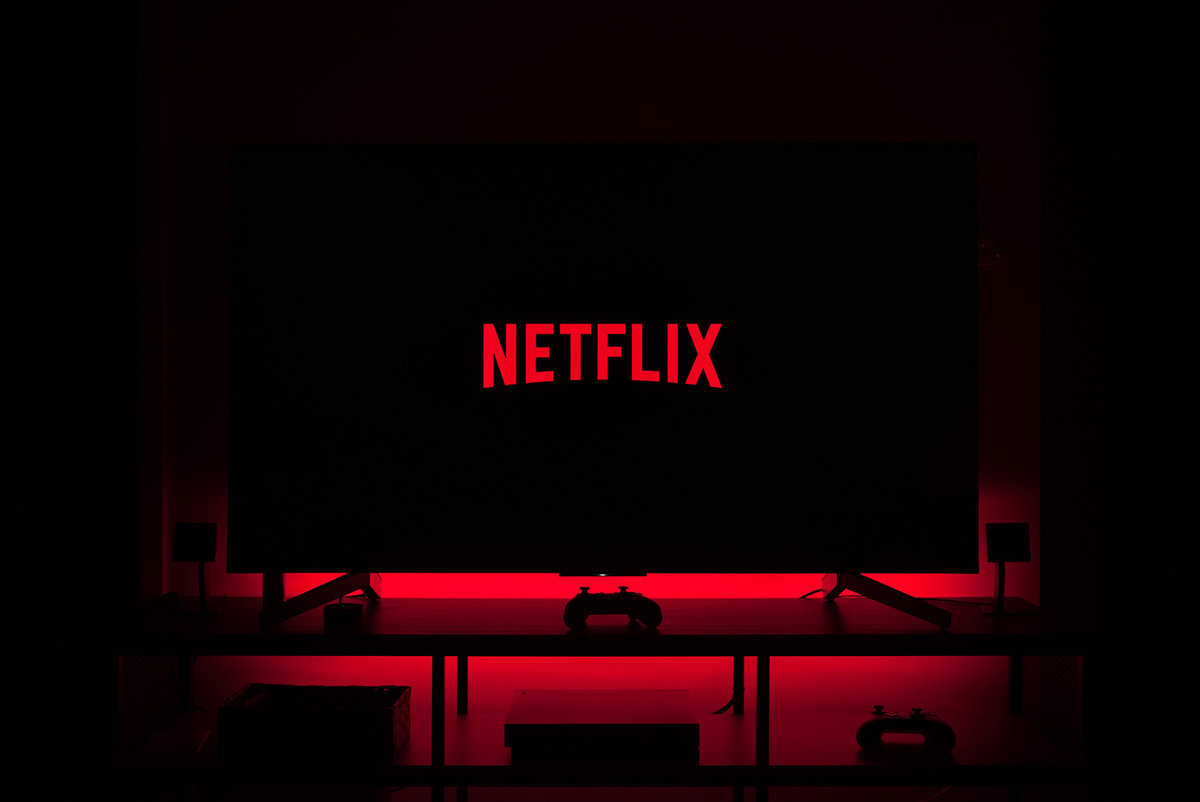

#**In this project we are doing**

* Understand the dataset and problem statement
* Exploratory Data Analysis
* Dealing with missing values and outliers
* Data Cleaning
* Exploring Exceptional Cases
* Pre-processing-TFIDF/bag of words
* Selecting the approach and alogorithm to be used
* Brief strategy for cluster formed
* Conclusion

#**Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#Let's Understand our Data First

#Import Libraries

In [1]:
#necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


#Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read the data
df=pd.read_csv("/content/drive/MyDrive/Netflix movies and TV shows cluster/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

#Dataset first look

In [4]:
#dataset first look, see in transpose
df.head().T

,0,1,2,3,4
show_id,s1,s2,s3,s4,s5
type,TV Show,Movie,Movie,Movie,Movie
title,3%,7:19,23:59,9,21
director,NaN,Jorge Michel Grau,Gilbert Chan,Shane Acker,Robert Luketic
cast,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Elijah Wood, John C. Reilly, Jennifer Connelly...","Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
country,Brazil,Mexico,Singapore,United States,United States
date_added,"August 14, 2020","December 23, 2016","December 20, 2018","November 16, 2017","January 1, 2020"
release_year,2020,2016,2011,2009,2008
rating,TV-MA,TV-MA,R,PG-13,PG-13
duration,4 Seasons,93 min,78 min,80 min,123 min


#Dataset Rows and Columns Count

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


so we can see there are 7787 rows and 12 columns. 1 int type and 11 object type columns.

In [9]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


#Duplicated Values

In [11]:
#check duplicated values
df.duplicated().sum()

0

* **So, There are no duplicated values in dataset**

#Misssing Values/ Null Values

In [12]:
# checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* **We have 2389 null values in director, 718 in cast, 507 in country, 10 in date_added, 7 in rating column**

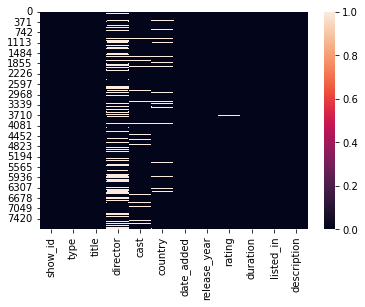

In [15]:
#Visualizing the missing values
sns.heatmap(df.isnull())

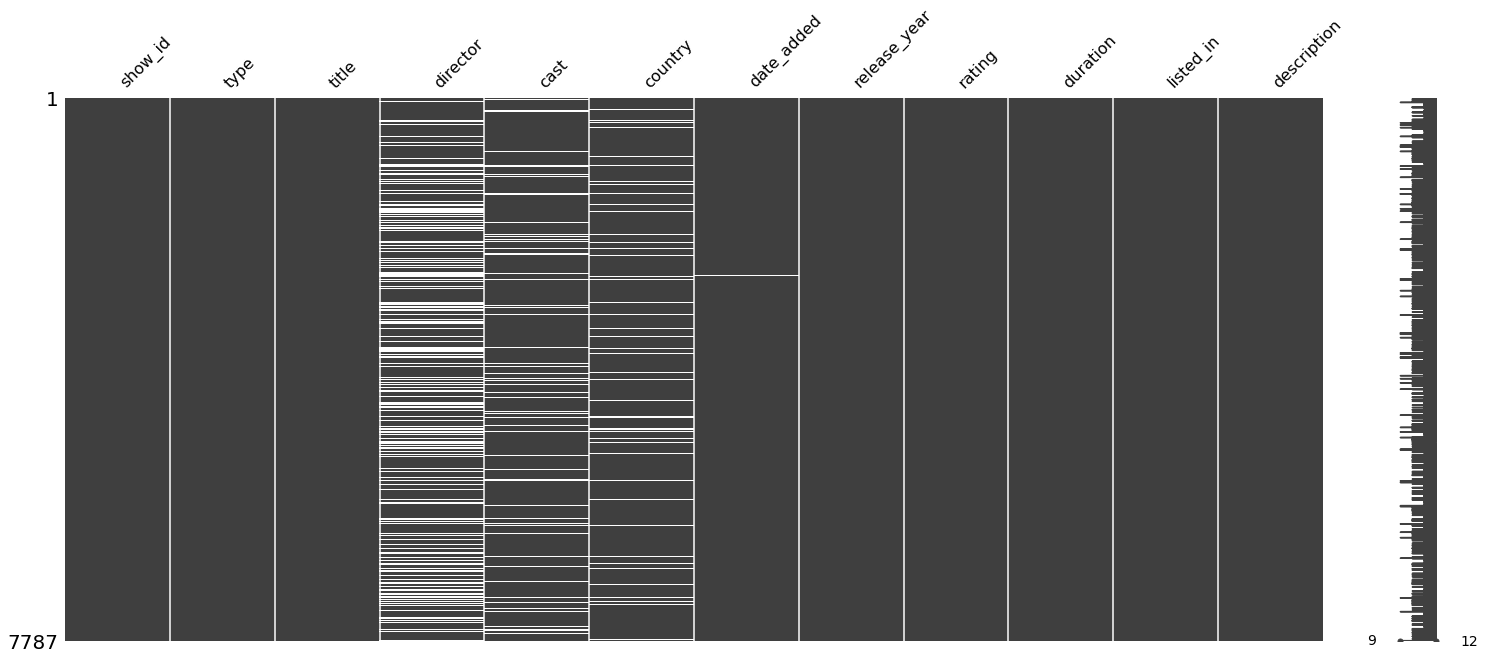

In [16]:
msno.matrix(df)

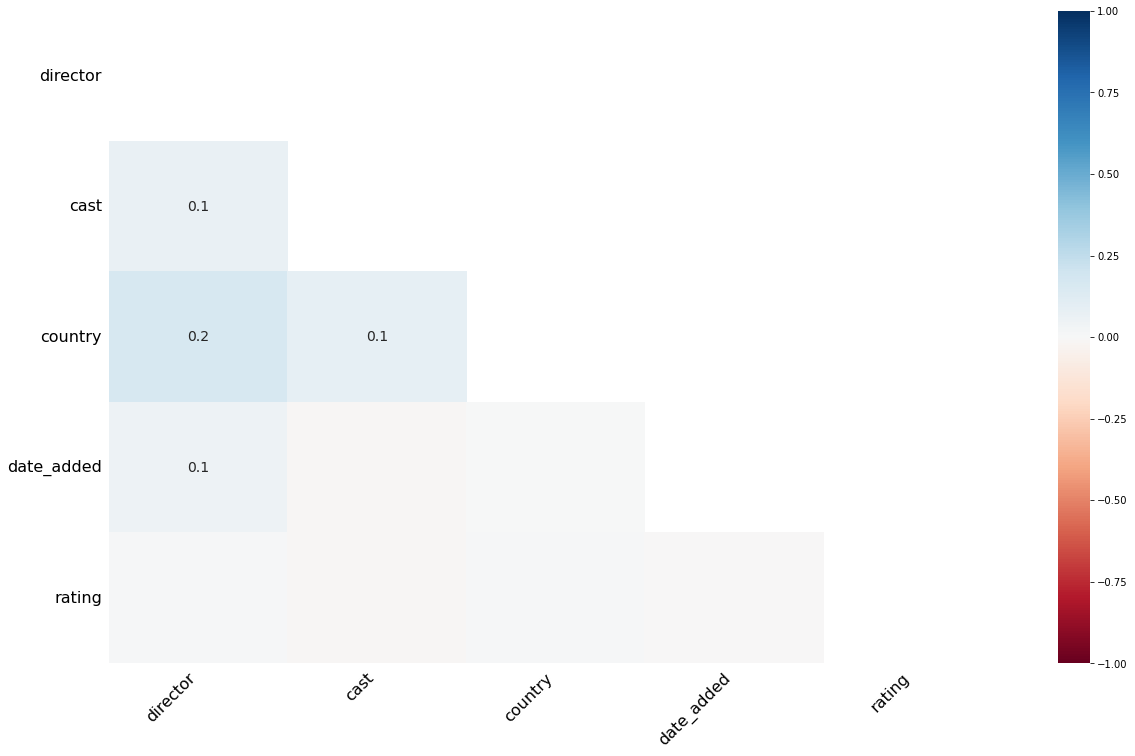

In [17]:
msno.heatmap(df)

* here also we can visualize same thing
  * diector,cast,country has many missing values, rating has small missing values

In [75]:
#Looking for unique values
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

We know from our dataset
* 7787 rows, 12 columns ( 1 int type, 11 object type)
* No duplicate rows
* We had 2389 null values in director, 718 in cast, 507 in country, 10 in date_added, 7 in rating column.
* almost all columns in dataset have unique values

#**Understanding the variables**

In [76]:
#dataset columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [77]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


#Variables Description

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#**Data Wrangling/EDA**

#univariate analysis before clustering

#1.Type column

In [63]:
df.type.value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

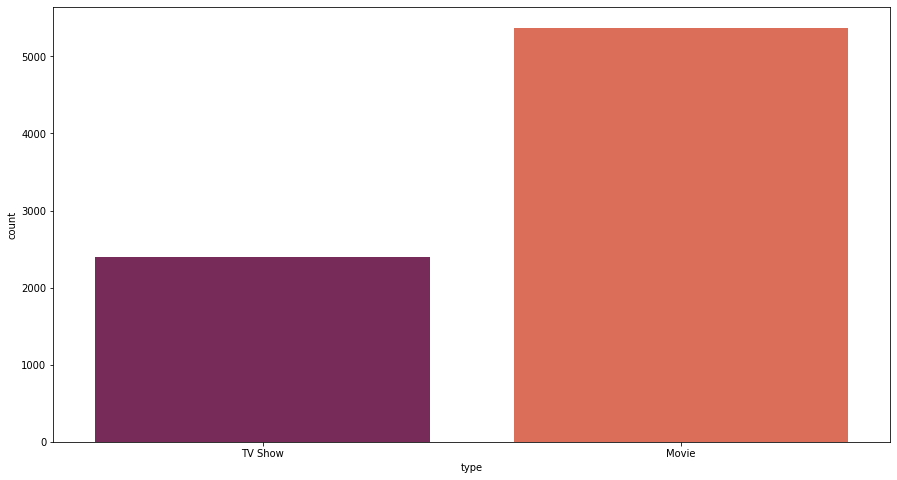

In [64]:
plt.figure(figsize=(15,8))
sns.countplot(x='type',data=df,color='b',palette='rocket')

* We can see netflix has more movies than tv shows.
* 5372 movies and 2398 tv shows

Text(0.5, 1.0, 'Distribution of Type')

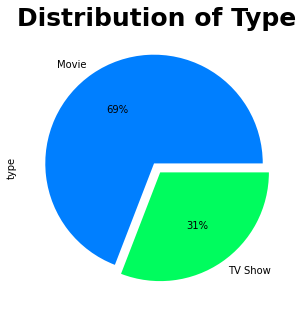

In [65]:
#better visualization with pie chart
sns.set_palette('gist_ncar')
df.type.value_counts().plot(kind='pie',autopct='%1.0f%%',explode=(0.05, 0.05))
plt.title('Distribution of Type', fontsize=25,fontweight='bold')

**It seems like Netflix has more movies than TV shows in a percentage of 69% against 31% approximately.**

#2.Title Column

In [30]:
#number unique points
df.title.nunique()

7787

In [5]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


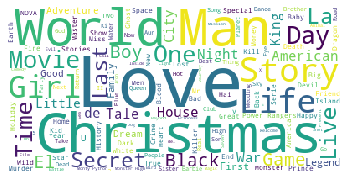

In [6]:
#subsetting the dataframe
df_wc=df['title']
text=" ".join(i for i in df_wc)
#create stopword list
stopwords=set(STOPWORDS)
#generate a word cloud image
wordcloud=WordCloud(stopwords=stopwords, background_color='white').generate(text)
#Display the generated images
plt.imshow(wordcloud,interpolation='nearest')
plt.axis('off')
plt.show()


* Inference:
  * 'Love','Man','World','Story','Life' seems very common in titles
  * There are overwhelming number of content having 'Christmas'
  * We are suspecting "Christmas" titles to be a very seasonal thing with most of the shows likely to be released during the month of December. However, we do not have the release month in this data to confirm our hypothesis.

In [39]:
df.title

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

#3.Director

In [78]:
#number of unique dir
df.director.nunique()

4049

In [79]:
#looking at director
df.director

0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


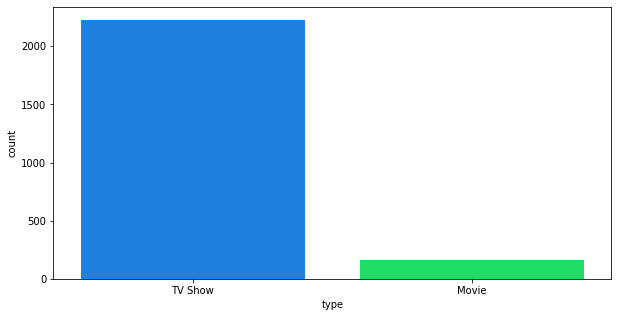

In [80]:
#Looking for which category have maximum nulls in director column
missing_df=df[df['director'].isna()]
sns.countplot(missing_df['type'])

* **Inference:** Most of the missing columns of directors are for TV Shows

#**Top 10 Directors of Netflix**

Text(0.5, 1.0, 'Top 10 Directors of Netflix')

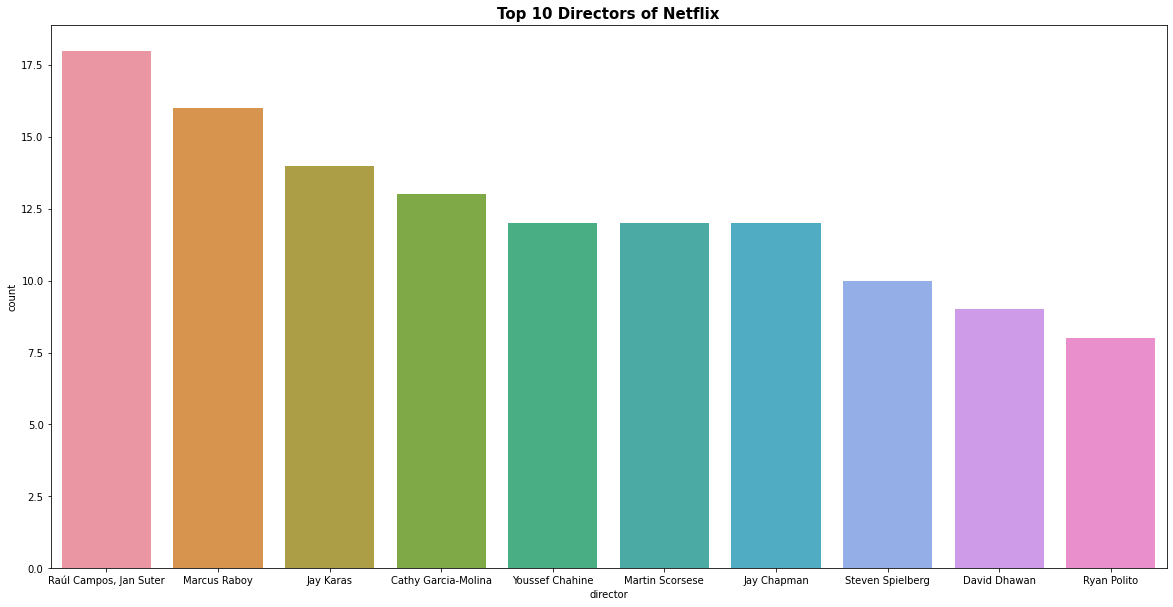

In [81]:
#visualize top 10 directors 
plt.figure(figsize=(20,10))
graph=sns.countplot(x='director',data=df,order=df.director.value_counts().head(10).index)
graph.set_title("Top 10 Directors of Netflix",fontsize=15,fontweight='bold')

* Inference:
    * Raul Campos, jan suter combinely best director who directs most movies(18) in netflix followed by marcus roby(16), jay karas(14), catthy garcia-molina(13) etc.

In [7]:
#filling null values of director column
df['director']=df['director'].fillna('',inplace=True)

#**4.Cast**

In [56]:
#unique number of cast
df.cast.nunique()

6831

In [8]:
#fill the missing values
df_actors=df['cast'].fillna('')

In [102]:
df_actors

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                     
Name: cast, Length: 7787, dtype: object

#**Top 10 actors on netflix**

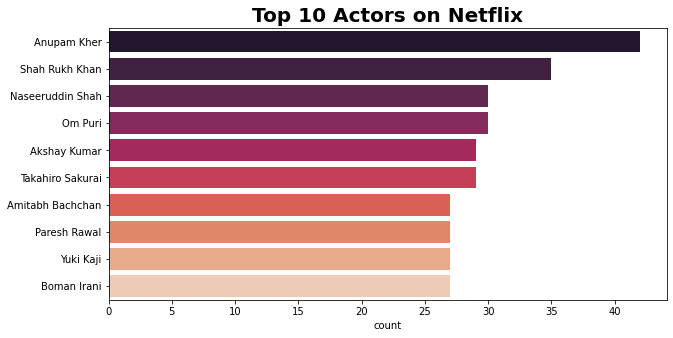

In [110]:
# Graph for top 10 actors
actor = df[df.cast != ' '].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

#code for graph visualization
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='rocket')
plt.title('Top 10 Actors on Netflix',fontsize=20,fontweight='bold')
plt.show()

* Inference:
    * Anupam Kher is the most popular actor in netflix followed by sharukhkhan, nashiruddin shah,om puri,akshay kumar etc.
    * Anupam kher's movie count is over 40 in netflix and for sharukhkhan it is 35. even no body is nearer to them in terms of movie count in netflix. It defines that netflix prefers both of them very much in their movies.

#5.Country

In [111]:
#unique column in country
df.country.nunique()

681

#**Top 10 countries on netflix**

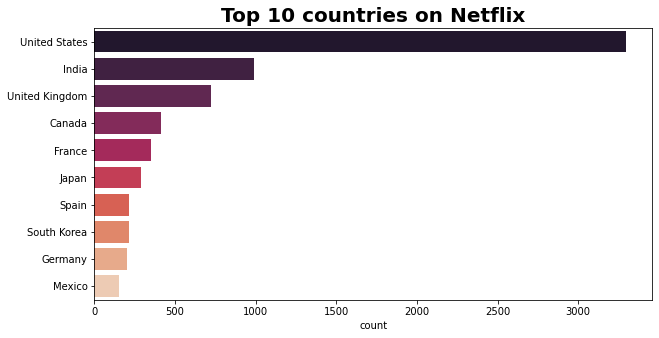

In [113]:
# Graph for top 10 countries
country = df[df.country != ' '].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

#code for graph visualization
sns.countplot(y = country, order=country.value_counts().index[:10], palette='rocket')
plt.title('Top 10 countries on Netflix',fontsize=20,fontweight='bold')
plt.show()

* Inference:

 So, As you can see that 

  *   The United States stands out on top since Netflix is an American company.
 
  *   India  comes in second followed by the UK and Canada.



#6.Date Added

In [9]:
#changed date added to datetime object 
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [10]:
 #year wise movie counts
 df['year_added'].value_counts().reset_index().rename(columns={'index': 'year','year_added':'movie_count'})

,year,movie_count
0,2019.0,2153
1,2020.0,2009
2,2018.0,1685
3,2017.0,1225
4,2016.0,443
5,2021.0,117
6,2015.0,88
7,2014.0,25
8,2011.0,13
9,2013.0,11


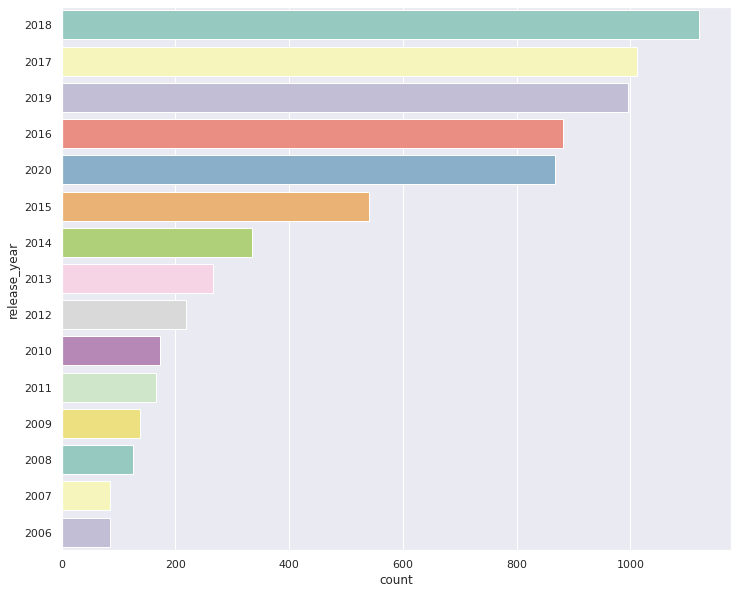

In [129]:
#visualize our result
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df, palette="Set3", order=df['release_year'].value_counts().index[0:15])

* Inference
    * 2018 has highest movie counts in netflix followed by 2017,2016,2015 etc.
    * year by year movie counts are increasing it defines public likes netflix content year by year and new public joins netflix. so it defines sustainable growth of netflix.

#7.Release years

#**Total Content Added each year**

In [31]:
df_year2 = df[['type','year_added']]
movie_year = df_year2[df_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})

show_year = df_year2[df_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})


In [13]:
mo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      0 non-null      object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
 12  year_added    7777 non-null   float64       
 13  month_added   7777 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 851.8+ KB


In [35]:
show_year

,year,count
0,2020.0,697
1,2019.0,656
2,2018.0,430
3,2017.0,361
4,2016.0,185
5,2015.0,30
6,2021.0,29
7,2014.0,6
8,2013.0,5
9,2008.0,1


In [36]:
sns.pointplot(data=df_year2, x='year', y='count')

ValueError: ignored

In [32]:
sns.lineplot(data=df_year2, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count',marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
sns.lineplot(data=show_year, x='year', y='count',marker = 'o',
         markerfacecolor = 'green', markersize = 12)

ValueError: ignored

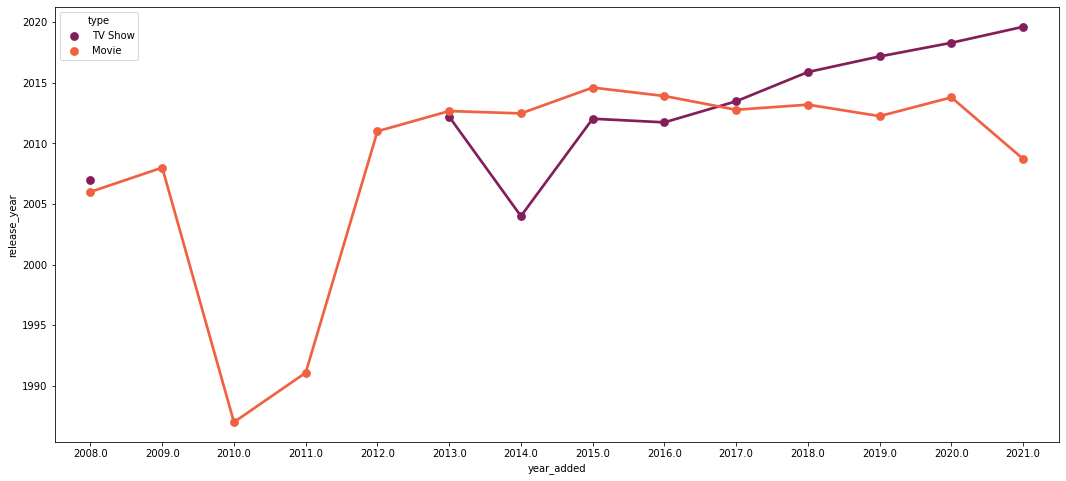

In [38]:
fig,ax=plt.subplots(figsize=(18,8))
sns.pointplot(data=df,x='year_added',y='release_year',color='g',hue='type',ci= None,palette='rocket')

#**8.Rating**

In [40]:
#check the unique values of rating
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#create a pie chart for better visualization
